# OPTIMIZATION METHODS - PROGRAM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss Function
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))

# Gradient Descent Variants and Optimizers
class Optimizer:
    def __init__(self, method, lr=0.01, beta=0.9, epsilon=1e-8, batch_size=None):
        self.method = method
        self.lr = lr
        self.beta = beta  # Momentum beta
        self.epsilon = epsilon
        self.v = 0  # Momentum term
        self.s = 0  # RMSProp term
        self.t = 0  # Time step for Adam
        self.batch_size = batch_size  # For Mini-Batch GD

    def update(self, dw, dw_prev=None):
        if self.method == "sgd":
            return -self.lr * dw
        elif self.method == "momentum":
            self.v = self.beta * self.v + (1 - self.beta) * dw
            return -self.lr * self.v
        elif self.method == "adagrad":
            self.s += dw ** 2
            return -self.lr * dw / (np.sqrt(self.s) + self.epsilon)
        elif self.method == "rmsprop":
            self.s = self.beta * self.s + (1 - self.beta) * (dw ** 2)
            return -self.lr * dw / (np.sqrt(self.s) + self.epsilon)
        elif self.method == "adam":
            self.t += 1
            self.v = self.beta * self.v + (1 - self.beta) * dw
            self.s = self.beta * self.s + (1 - self.beta) * (dw ** 2)
            v_corrected = self.v / (1 - self.beta ** self.t)
            s_corrected = self.s / (1 - self.beta ** self.t)
            return -self.lr * v_corrected / (np.sqrt(s_corrected) + self.epsilon)
        elif self.method == "batch_gd":
            return -self.lr * dw
        elif self.method == "mini_batch_gd":
            return -self.lr * dw

# Logistic Regression Model with different optimizers
def logistic_regression(X_train, y_train, X_test, y_test, optimizer_name, epochs=100, lr=0.01, batch_size=None):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0
    optimizer = Optimizer(optimizer_name, lr, batch_size=batch_size)
    losses = []
    epoch_accuracies = []  # List to store accuracy after each epoch

    for epoch in range(epochs):
        if optimizer_name == "mini_batch_gd":
            # Mini-Batch Gradient Descent
            indices = np.random.choice(m, batch_size, replace=False)
            X_batch = X_train[indices]
            y_batch = y_train[indices]
        else:
            X_batch = X_train
            y_batch = y_train

        y_pred = sigmoid(np.dot(X_batch, weights) + bias)  # y_pred has shape (batch_size,)
        dw = np.dot(X_batch.T, (y_pred - y_batch)) / len(y_batch)  # dw has shape (n,)
        db = np.sum(y_pred - y_batch) / len(y_batch)  # db is scalar

        # Update weights using optimizer
        weights += optimizer.update(dw)

        # Update bias directly (no optimizer needed for bias)
        bias -= optimizer.lr * db

        loss = compute_loss(y_batch, y_pred)
        losses.append(loss)

        # Predict on test set
        y_pred_test = sigmoid(np.dot(X_test, weights) + bias) >= 0.5
        acc = accuracy_score(y_test, y_pred_test)
        epoch_accuracies.append(acc)  # Store accuracy for this epoch

    return losses, epoch_accuracies

# Load Titanic Dataset
titanic = sns.load_dataset('titanic')

# Preprocessing the data
titanic = titanic.dropna(subset=['age', 'embarked'])  # Drop rows with missing 'age' or 'embarked'
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})  # Convert gender to numerical
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Convert Embarked to numerical

# Selecting relevant features
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = titanic[features].values
y = titanic['survived'].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1)	Gradient Descent (GD): Batch Gradient Descent; Stochastic Gradient Descent (SGD); Mini-Batch Gradient Descent

Method BATCH_GD: Accuracy = 0.7692
Method SGD: Accuracy = 0.7692
Method MINI_BATCH_GD: Accuracy = 0.7762


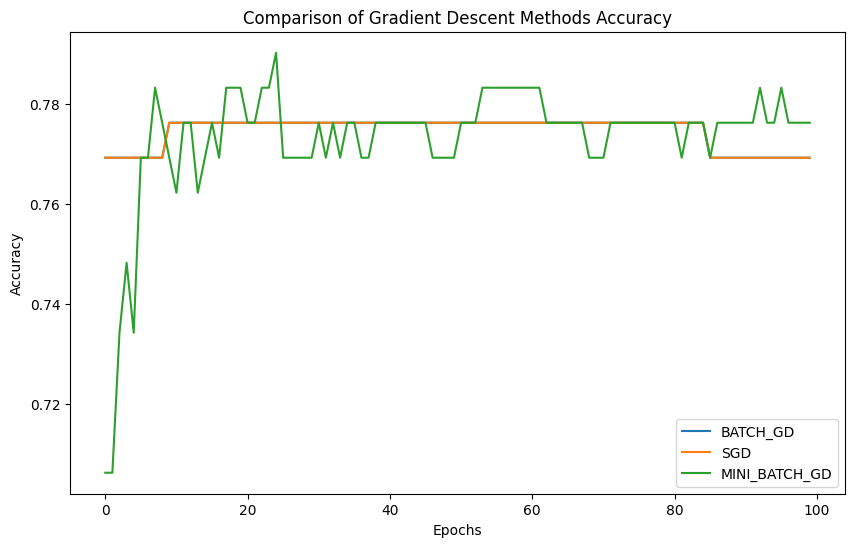

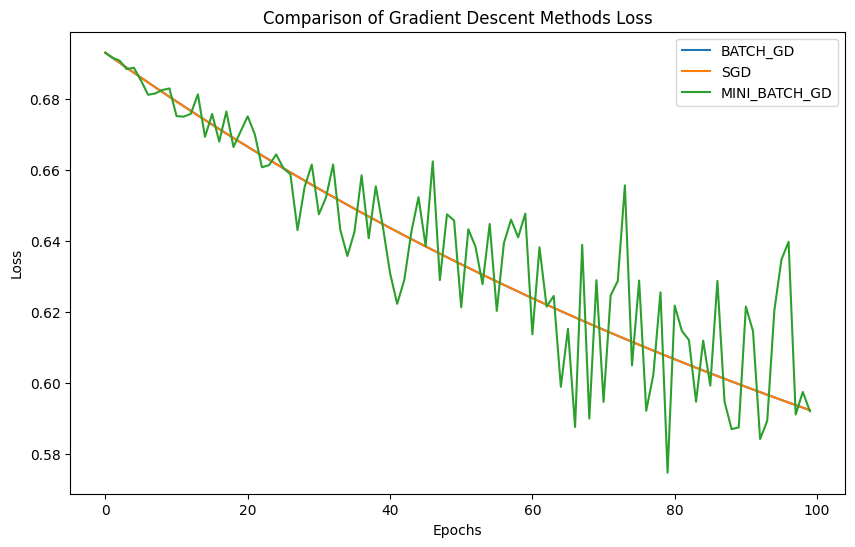

In [ ]:
# Gradient Descent (GD) Methods
methods_gd = ["batch_gd", "sgd", "mini_batch_gd"]
results_loss_gd = {}
results_acc_gd = {}

for method in methods_gd:
    batch_size = 32 if method == "mini_batch_gd" else None
    losses, acc = logistic_regression(X_train, y_train, X_test, y_test, method, epochs=100, lr=0.01, batch_size=batch_size)
    results_loss_gd[method] = losses
    results_acc_gd[method] = acc
    print(f"Method {method.upper()}: Accuracy = {acc[-1]:.4f}")

# Plot Accuracy for GD Methods
plt.figure(figsize=(10, 6))
for method in methods_gd:
    plt.plot(results_acc_gd[method], label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Comparison of Gradient Descent Methods Accuracy")
plt.legend()
plt.show()

# Plot Loss for GD Methods
plt.figure(figsize=(10, 6))
for method in methods_gd:
    plt.plot(results_loss_gd[method], label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Gradient Descent Methods Loss")
plt.legend()
plt.show()

# 2)	Momentum

Method MOMENTUM: Accuracy = 0.7762


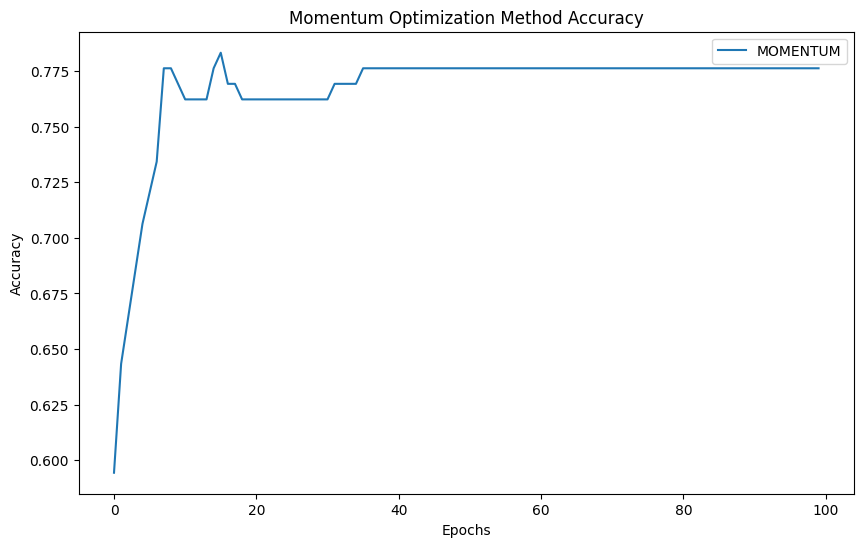

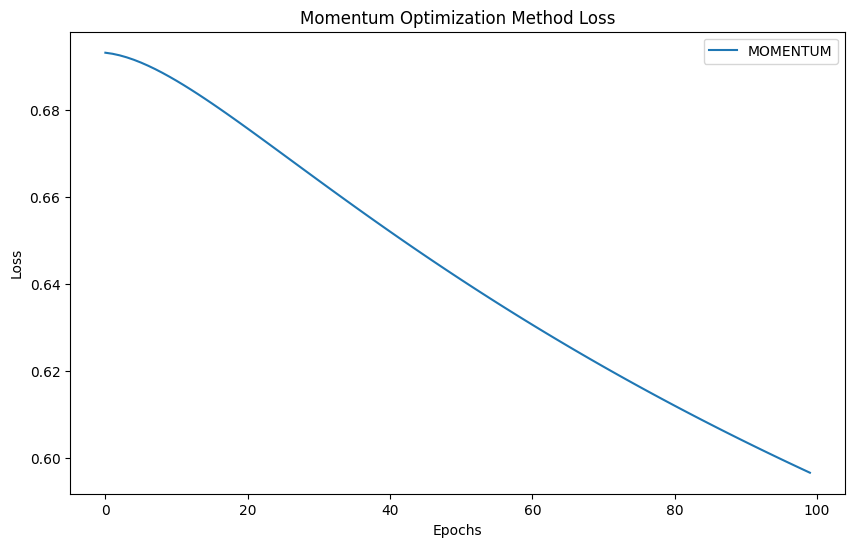

In [ ]:
# Momentum Method
method = "momentum"
losses, acc = logistic_regression(X_train, y_train, X_test, y_test, method, epochs=100, lr=0.01)
print(f"Method {method.upper()}: Accuracy = {acc[-1]:.4f}")

# Plot Accuracy for Momentum
plt.figure(figsize=(10, 6))
plt.plot(acc, label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Momentum Optimization Method Accuracy")
plt.legend()
plt.show()

# Plot Loss for Momentum
plt.figure(figsize=(10, 6))
plt.plot(losses, label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Momentum Optimization Method Loss")
plt.legend()
plt.show()


# 3)	Adagrad (Adaptive Gradient Algorithm)

Method ADAGRAD: Accuracy = 0.7343


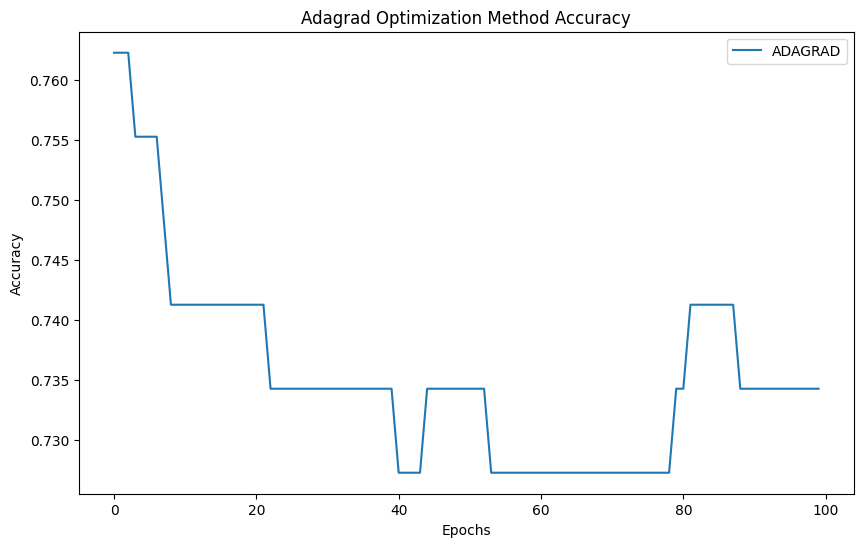

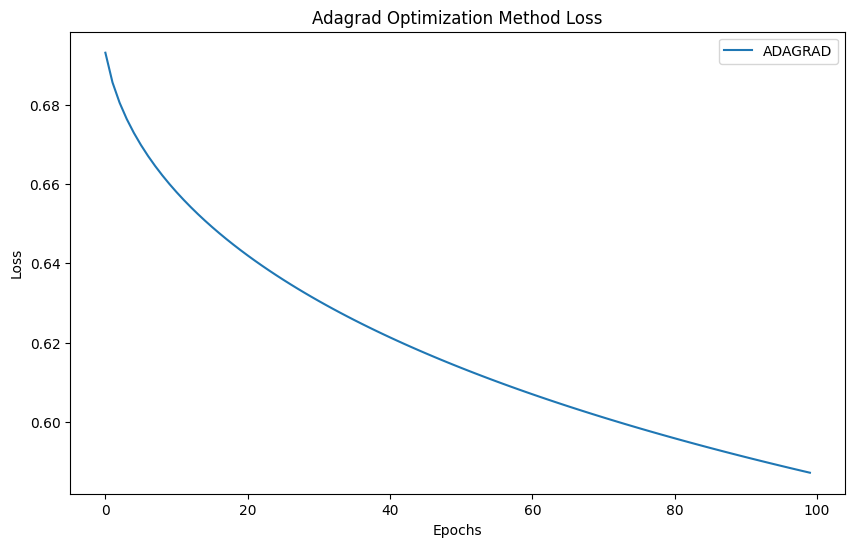

In [ ]:
# Adagrad Method
method = "adagrad"
losses, acc = logistic_regression(X_train, y_train, X_test, y_test, method, epochs=100, lr=0.01)
print(f"Method {method.upper()}: Accuracy = {acc[-1]:.4f}")

# Plot Accuracy for Adagrad
plt.figure(figsize=(10, 6))
plt.plot(acc, label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Adagrad Optimization Method Accuracy")
plt.legend()
plt.show()

# Plot Loss for Adagrad
plt.figure(figsize=(10, 6))
plt.plot(losses, label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Adagrad Optimization Method Loss")
plt.legend()
plt.show()


# 4)	RMSProp (Root Mean Square Propagation)

Method RMSPROP: Accuracy = 0.7832


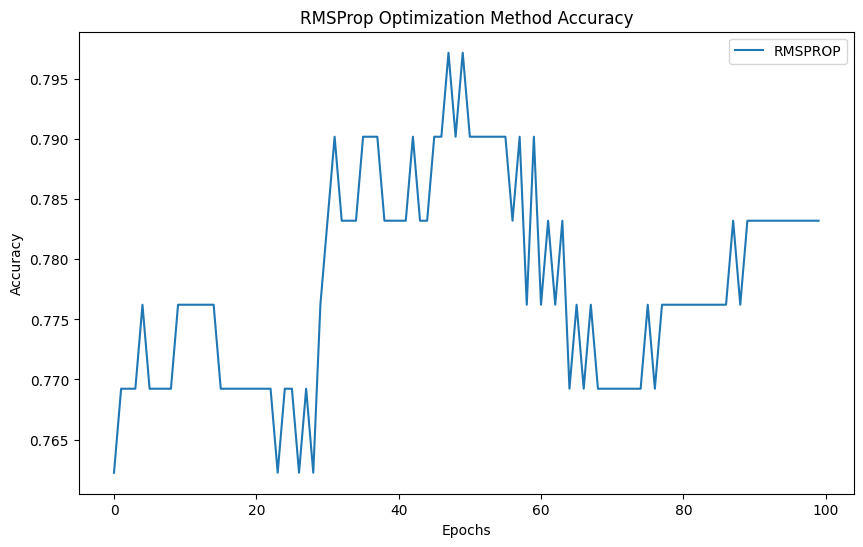

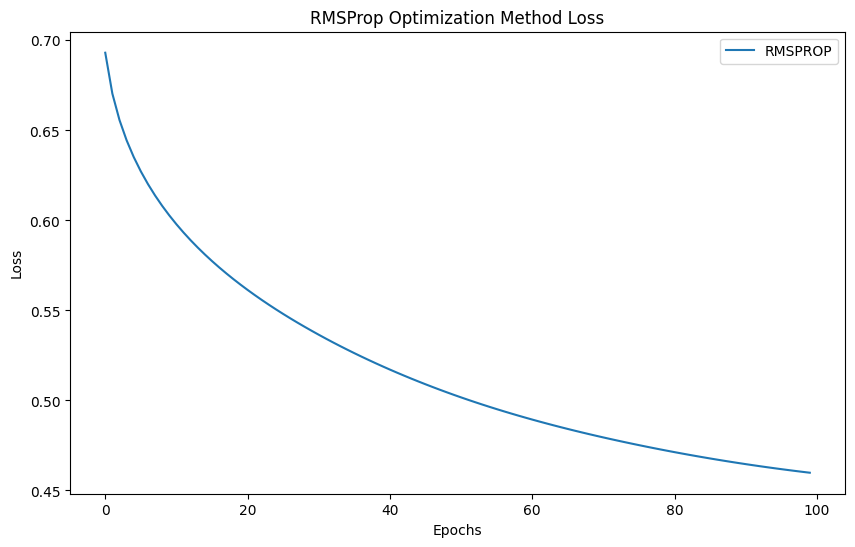

In [ ]:
# RMSProp Method
method = "rmsprop"
losses, acc = logistic_regression(X_train, y_train, X_test, y_test, method, epochs=100, lr=0.01)
print(f"Method {method.upper()}: Accuracy = {acc[-1]:.4f}")

# Plot Accuracy for RMSProp
plt.figure(figsize=(10, 6))
plt.plot(acc, label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("RMSProp Optimization Method Accuracy")
plt.legend()
plt.show()

# Plot Loss for RMSProp
plt.figure(figsize=(10, 6))
plt.plot(losses, label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("RMSProp Optimization Method Loss")
plt.legend()
plt.show()


# 5)	Adam (Adaptive Moment Estimation)

Method ADAM: Accuracy = 0.7832


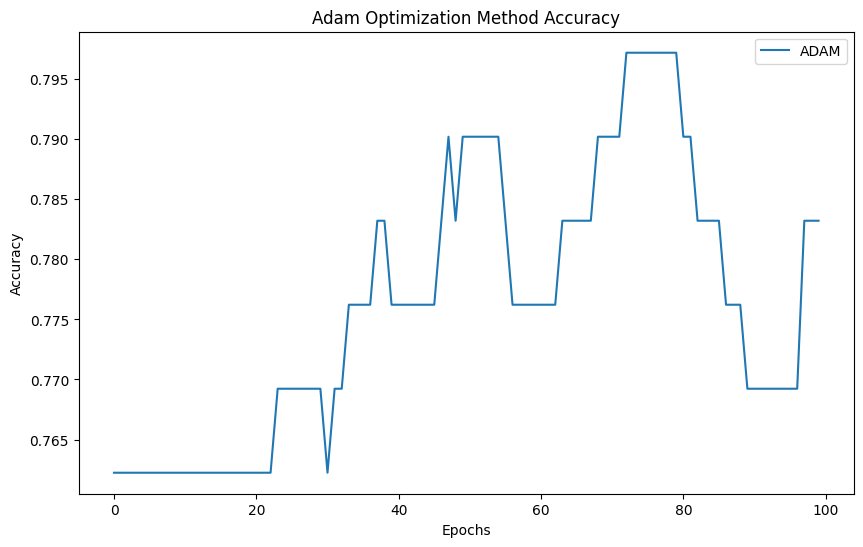

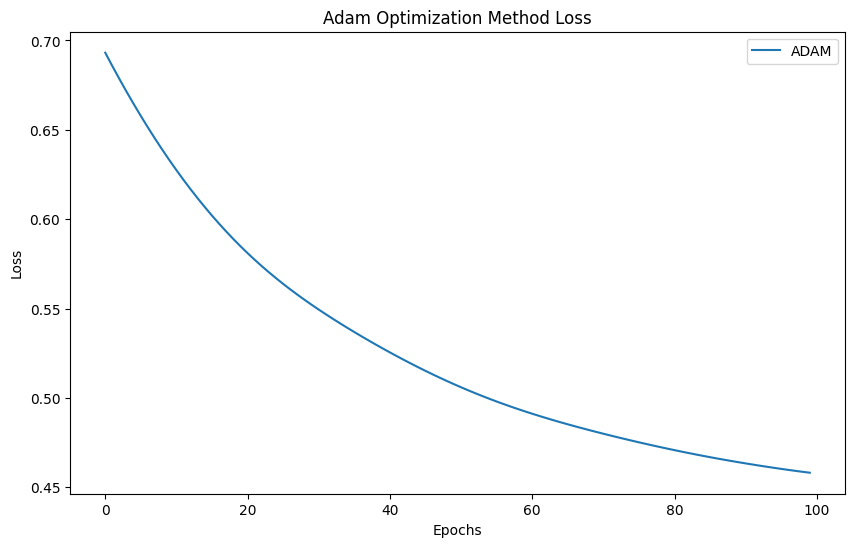

In [ ]:
# Adam Method
method = "adam"
losses, acc = logistic_regression(X_train, y_train, X_test, y_test, method, epochs=100, lr=0.01)
print(f"Method {method.upper()}: Accuracy = {acc[-1]:.4f}")

# Plot Accuracy for Adam
plt.figure(figsize=(10, 6))
plt.plot(acc, label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Adam Optimization Method Accuracy")
plt.legend()
plt.show()

# Plot Loss for Adam
plt.figure(figsize=(10, 6))
plt.plot(losses, label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Adam Optimization Method Loss")
plt.legend()
plt.show()


# OVERALL

Method SGD: Accuracy = 0.9737
Method MOMENTUM: Accuracy = 0.9649
Method ADAGRAD: Accuracy = 0.9825
Method RMSPROP: Accuracy = 0.9825
Method ADAM: Accuracy = 0.9825
Method BATCH_GD: Accuracy = 0.9737
Method MINI_BATCH_GD: Accuracy = 0.9737


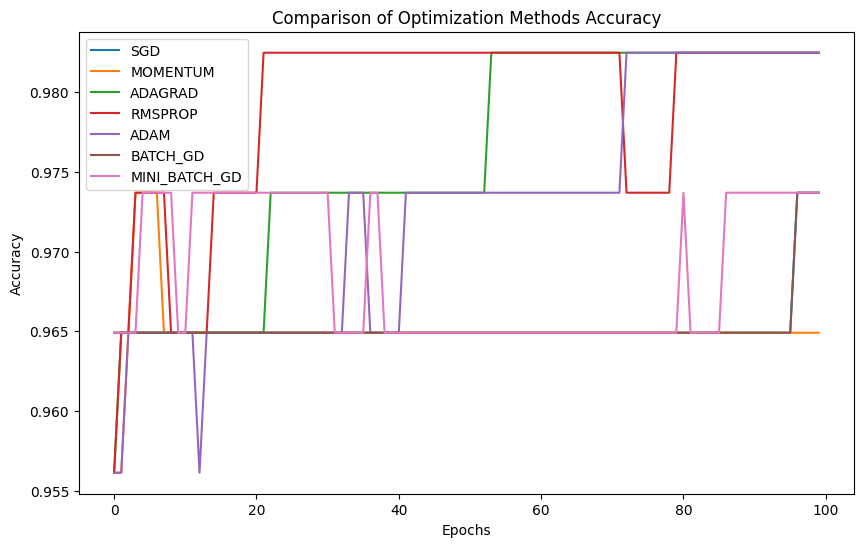

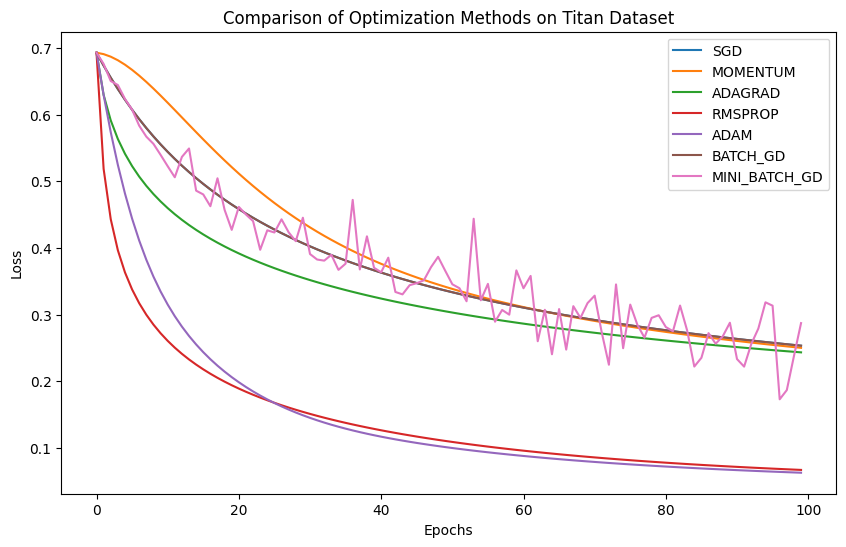

In [2]:
# List of optimization methods
methods = ["sgd", "momentum", "adagrad", "rmsprop", "adam", "batch_gd", "mini_batch_gd"]
results_loss = {}
results_acc = {}

for method in methods:
    batch_size = 32 if method == "mini_batch_gd" else None
    losses, acc = logistic_regression(X_train, y_train, X_test, y_test, method, epochs=100, lr=0.01, batch_size=batch_size)
    results_loss[method] = losses
    results_acc[method] = acc
    print(f"Method {method.upper()}: Accuracy = {acc[-1]:.4f}")

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(results_acc[method], label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Comparison of Optimization Methods Accuracy")
plt.legend()
plt.show()

# # Plot the loss comparison
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(results_loss[method], label=f"{method.upper()}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Optimization Methods on Titan Dataset")
plt.legend()
plt.show()